In [45]:
using Images, FileIO, Plots, TestImages

In [35]:
function box_kernel(size::Int)
    return (1 / size^2) .* ones(size, size)
end

function gaussian_kernel(size::Int, σ)
    scale = 0.25
    x = range(-scale*σ, scale*σ, size)
    y = range(-scale*σ, scale*σ, size)

    gaussian = [(1/2*π*σ^2)exp(-((xi^2 + yi^2) / (2*σ^2))) for xi in x, yi in y]
    normalized_gaussian = gaussian ./ sum(gaussian)
    return normalized_gaussian
end

function gaussian_sobel_kernel(size::Int, σ, directional_vector::Vector{Float64})
    scale = 0.25
    x = range(-scale*σ, scale*σ, size)
    y = range(-scale*σ, scale*σ, size)

    X_Grid = reshape(x, 1, :) .+ zeros(size, 1)
    Y_Grid = reshape(y, :, 1) .+ zeros(1, size)

    G = (1 / (2 * π * σ^2)) .* exp.(-((X_Grid.^2 .+ Y_Grid.^2) ./ (2 * σ^2)))
    δ_gaussian_x = -X_Grid .* G ./ σ^2
    δ_gaussian_y = -Y_Grid .* G ./ σ^2

    # directional derivative 
    ∇ᵤG = directional_vector[1] .* δ_gaussian_x .+ directional_vector[2] .* δ_gaussian_y

    return ∇ᵤG
end

gaussian_sobel_kernel (generic function with 1 method)

In [29]:
function gaussian_convolve(image, kernel_size = 3)
    
    kernel = gaussian_kernel(kernel_size, 1)
    convolved_image = zeros((image.size .- (kernel_size, kernel_size)) .+ 1)

    for i in 1:convolved_image.size[1]
        for j in 1:convolved_image.size[2]
            s = sum(image[i:(i+kernel_size - 1), j:(j+kernel_size - 1)] .* kernel)
            convolved_image[i,j] = min(s, 1.0)
        end
    end

    return convolved_image
end



function box_convolve(image, kernel_size = 3)
    
    kernel = box_kernel(kernel_size)
    convolved_image = zeros((image.size .- (kernel_size, kernel_size)) .+ 1)

    for i in 1:convolved_image.size[1]
        for j in 1:convolved_image.size[2]
            s = sum(image[i:(i+kernel_size - 1), j:(j+kernel_size - 1)] .* kernel)
            convolved_image[i,j] = min(s, 1.0)
        end
    end
    
    return convolved_image
end


function sobel_convolve(image, kernel_size = 3, directional_vector::Vector{Float64}=[1.0,0.0])
    
    kernel = gaussian_sobel_kernel(kernel_size, 1, directional_vector)
    convolved_image = zeros((image.size .- (kernel_size, kernel_size)) .+ 1)

    for i in 1:convolved_image.size[1]
        for j in 1:convolved_image.size[2]
            s = sum(image[i:(i+kernel_size - 1), j:(j+kernel_size - 1)] .* kernel)
            convolved_image[i,j] = min(s, 1.0)
        end
    end
    
    # Rescale to 0-1
    min_val = minimum(convolved_image)
    max_val = maximum(convolved_image)
    convolved_image = (convolved_image .- min_val) ./ (max_val - min_val)

    
    return convolved_image
end

sobel_convolve (generic function with 3 methods)

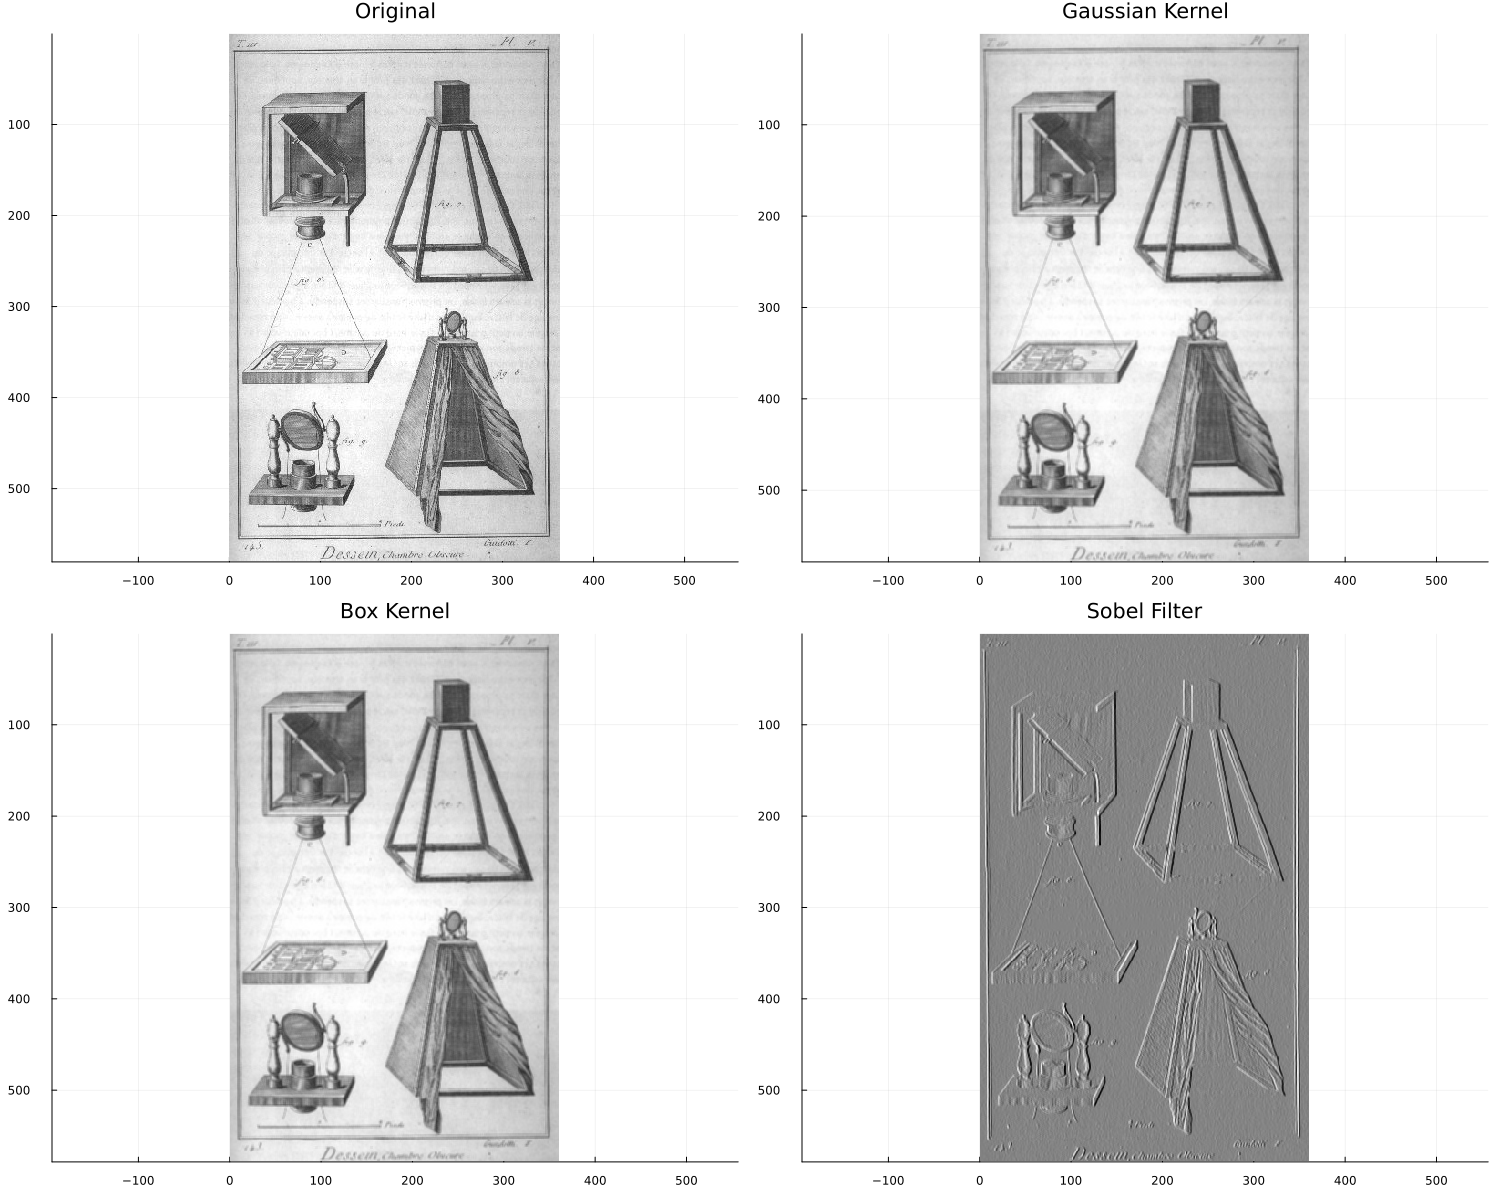

In [48]:
image = Gray.(load("./Camera_obscura.jpg"))


gaussian_image = Gray{N0f8}.(gaussian_convolve(image, 3))
boxed_image = Gray{N0f8}.(box_convolve(image, 3))
edge_image = Gray{N0f8}.(sobel_convolve(image, 3))


plot(
    plot(image, title="Original", color=:grays),
    plot(gaussian_image, title="Gaussian Kernel", color=:grays),
    plot(boxed_image, title = "Box Kernel", color=:gray),
    plot(edge_image, title = "Sobel Filter", color=:gray),
    layout = (2,2),
    size = (1500, 1200)
)


# Different directions

4×4 Matrix{Matrix{Gray{N0f8}}}:
 [0.467 0.486 … 0.478 0.471; 0.463 0.478 … 0.463 0.475; … ; 0.494 0.482 … 0.471 0.482; 0.502 0.482 … 0.478 0.478]  …  [0.475 0.498 … 0.494 0.49; 0.475 0.486 … 0.475 0.494; … ; 0.494 0.482 … 0.482 0.486; 0.51 0.486 … 0.482 0.478]
 [0.498 0.498 … 0.514 0.518; 0.506 0.494 … 0.51 0.518; … ; 0.478 0.482 … 0.498 0.486; 0.49 0.49 … 0.49 0.49]          [0.49 0.502 … 0.51 0.51; 0.498 0.494 … 0.502 0.514; … ; 0.486 0.486 … 0.494 0.49; 0.498 0.49 … 0.49 0.486]
 [0.533 0.514 … 0.522 0.529; 0.537 0.522 … 0.537 0.525; … ; 0.506 0.518 … 0.529 0.518; 0.498 0.518 … 0.522 0.522]     [0.502 0.502 … 0.514 0.518; 0.51 0.498 … 0.514 0.518; … ; 0.478 0.486 … 0.502 0.49; 0.486 0.494 … 0.494 0.494]
 [0.533 0.514 … 0.522 0.529; 0.537 0.522 … 0.537 0.525; … ; 0.506 0.518 … 0.529 0.518; 0.498 0.518 … 0.522 0.522]     [0.514 0.506 … 0.522 0.525; 0.518 0.506 … 0.522 0.522; … ; 0.486 0.494 … 0.51 0.498; 0.49 0.502 … 0.502 0.502]
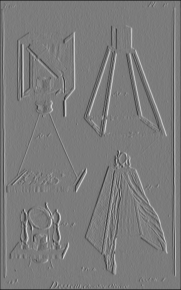
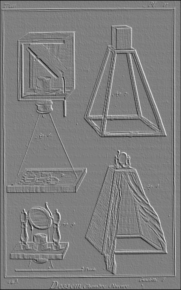
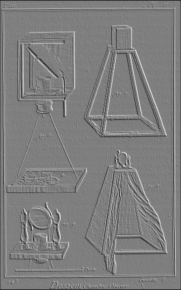
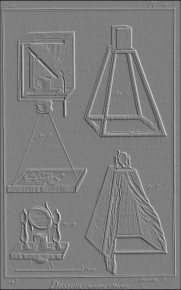
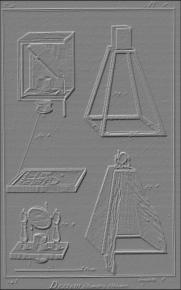
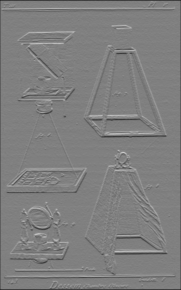
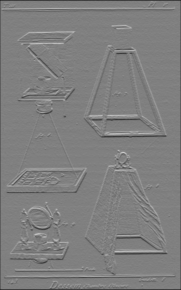
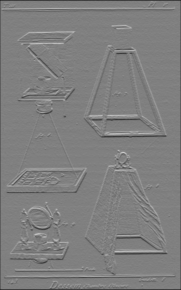
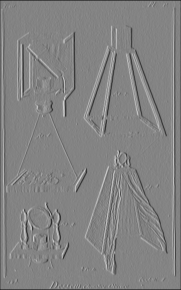
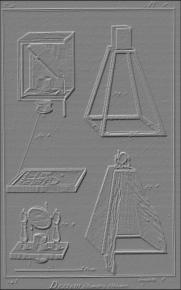
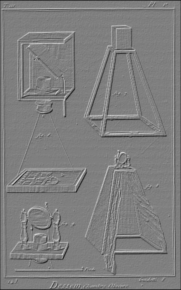
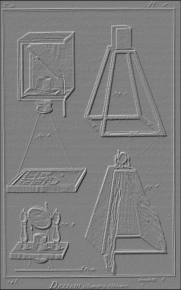
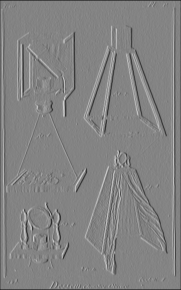
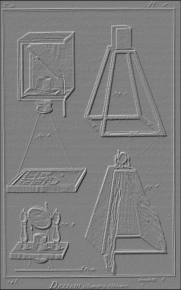
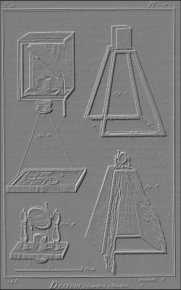
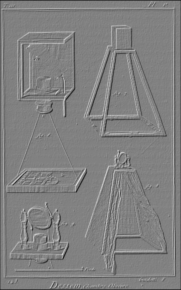

In [81]:
u₁ = [cos(pi/i) for i in 1:4] 
u₂ = [sin(pi/i) for i in 1:4]

image_vec = Matrix{Matrix{Gray{N0f8}}}(undef, length(u₁), length(u₂))

for i in 1:length(u₁)
    for j in 1:length(u₂)
        image_vec[i, j] = Gray{N0f8}.(sobel_convolve(image, 3, [u₁[i], u₂[j]]))
    end
end

image_vec


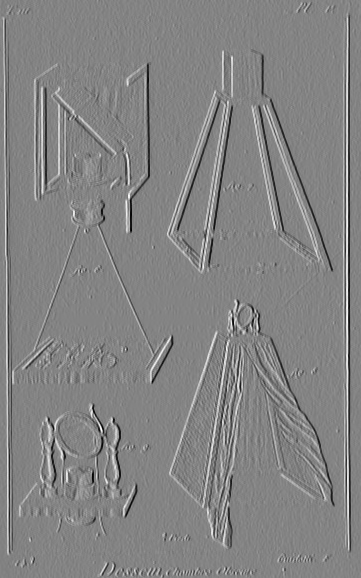

In [83]:
# x direction edges
Gray{N0f8}.(sobel_convolve(image, 3, [1.0, 0.0]))


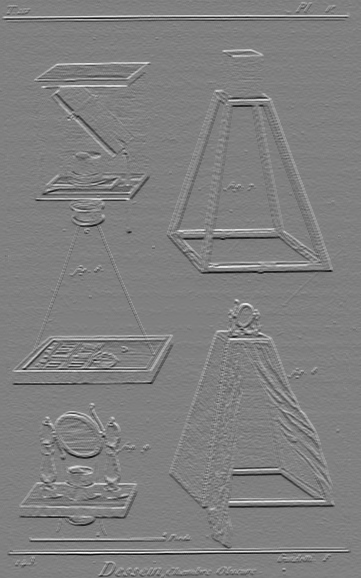

In [ ]:
# y direction edges
Gray{N0f8}.(sobel_convolve(image, 3, [0.0, 1.0]))